## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/CV_Project2')

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/CV_Project2/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile

with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd

In [11]:
labels = pd.read_csv('./labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [12]:
labels['breed'].value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
pomeranian                        111
great_pyrenees                    111
basenji                           110
samoyed                           109
airedale                          107
tibetan_terrier                   107
leonberg                          106
cairn                             106
beagle                            105
japanese_spaniel                  105
miniature_pinscher                102
australian_terrier                102
blenheim_spaniel                  102
irish_wolfhound                   101
lakeland_terrier                   99
saluki                             99
papillon                           96
siberian_husky                     95
norwegian_elkhound                 95
whippet                            95
pug         

### Get one-hot encodings of labels

In [0]:
import numpy as np
targets = pd.Series(labels['breed'])
one_hot = pd.get_dummies(targets, sparse = True)
one_hot_labels = np.asarray(one_hot)

In [14]:
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128
num_channel=3

In [16]:
from tqdm import tqdm
import cv2
x_train = []
y_train = []

i = 0 # initialisation
for f, img in tqdm(labels.values): # f for format ,jpg
    train_img = cv2.imread('./train/{}.jpg'.format(f),1)
    label = one_hot_labels[i]
    train_img_resize = cv2.resize(train_img, (img_rows, img_cols)) 
    x_train.append(train_img_resize)
    y_train.append(label)
    i += 1

100%|██████████| 10222/10222 [01:15<00:00, 135.54it/s]


Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [17]:
x_train_data = np.array(x_train, np.float32) / 255.   # /= 255 for normolisation
print (x_train_data.shape)
#x_train_data = np.expand_dims(x_train_data, axis = 3) # for keras to given input to Conv2D layer
print (x_train_data.shape)

y_train_data = np.array(y_train)

y_train_data.shape


(10222, 128, 128, 3)
(10222, 128, 128, 3)


(10222, 120)

Label :  doberman


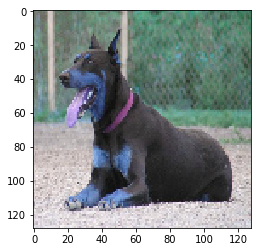

In [24]:
import matplotlib.pyplot as plt

plt.imshow(x_train_data[20])
print('Label : ',labels.iloc[20][1])

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=2)
print (x_train.shape)
print (x_val.shape)

(8177, 128, 128, 3)
(2045, 128, 128, 3)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [26]:
submission = pd.read_csv('sample_submission.csv')
test_img = submission['id']
submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

Run the below code to load the test image files in x_test_feature

In [27]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [01:16<00:00, 135.22it/s]


Normalize the test data and convert it into 4 dimensions

In [29]:
x_test_data = np.array(x_test_feature, np.float32) / 255. 
print (x_test_data.shape)
#x_test_data = np.expand_dims(x_test_data, axis = 3)
print (x_test_data.shape)

(10357, 128, 128, 3)
(10357, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [30]:
from keras.models import Sequential  # initial NN
from keras.layers import Dense, Dropout # construct each layer
from keras.layers import Conv2D # swipe across the image by 1
from keras.layers import MaxPooling2D # swipe across by pool size
from keras.layers import Flatten, GlobalAveragePooling2D

Using TensorFlow backend.


In [31]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation ='relu', input_shape = (img_rows, img_cols, num_channel))) 
model.add(MaxPooling2D(pool_size=3))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.8))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.8))

model.add(Flatten()) 
# fully connected layer 
model.add(Dense(units = 500, activation = 'relu')) 
model.add(Dropout(0.8))
# output layer
model.add(Dense(units = 120, activation = 'softmax')) 

W0722 04:08:43.201108 139861477623680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 04:08:43.239400 139861477623680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 04:08:43.252720 139861477623680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 04:08:43.286114 139861477623680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0722 04:08:43.320648 139861477623680 deprecation_wrapp

In [32]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.01)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
model.summary()

W0722 04:08:51.659747 139861477623680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0722 04:08:51.667471 139861477623680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 128)       0         
__________

### Use batch_size = 128 and epochs = 10 and execute the model

In [33]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.01)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 128)       0         
__________

In [34]:
batch_size = 128
nb_epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epochs, 
                    validation_data=(x_val, y_val),
                    initial_epoch=0)

W0722 04:09:09.782704 139861477623680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8177 samples, validate on 2045 samples
Epoch 1/20
8177/8177 [==============================] - 14s 2ms/step - loss: 4.8910 - acc: 0.0106 - val_loss: 4.7876 - val_acc: 0.0117
Epoch 2/20
8177/8177 [==============================] - 5s 574us/step - loss: 4.7808 - acc: 0.0111 - val_loss: 4.7895 - val_acc: 0.0088
Epoch 3/20
8177/8177 [==============================] - 5s 576us/step - loss: 4.7784 - acc: 0.0121 - val_loss: 4.7902 - val_acc: 0.0088
Epoch 4/20
8177/8177 [==============================] - 5s 576us/step - loss: 4.7777 - acc: 0.0109 - val_loss: 4.7919 - val_acc: 0.0088
Epoch 5/20
8177/8177 [==============================] - 5s 578us/step - loss: 4.7770 - acc: 0.0116 - val_loss: 4.7928 - val_acc: 0.0117
Epoch 6/20
8177/8177 [==============================] - 5s 578us/step - loss: 4.7771 - acc: 0.0105 - val_loss: 4.7931 - val_acc: 0.0117
Epoch 7/20
8177/8177 [==============================] - 5s 583us/step - loss: 4.7769 - acc: 0.0125 - val_loss: 4.7930 - val_acc: 0.0117
E

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from keras.layers import ZeroPadding2D

train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen=ImageDataGenerator(rescale=1./255)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator =train_datagen.flow(x_train,y=y_train,batch_size=32)
val_generator=val_datagen.flow(x_val,y=y_val,batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [37]:
model.fit_generator(train_generator,
                      steps_per_epoch = 100,
                      validation_data = val_generator,
                      validation_steps = 4,
                      epochs = 10,
                      verbose = 1)

Epoch 1/10
100/100 [==============================] - 11s 109ms/step - loss: 4.7798 - acc: 0.0125 - val_loss: 4.8094 - val_acc: 0.0156
Epoch 2/10
100/100 [==============================] - 11s 110ms/step - loss: 4.7895 - acc: 0.0100 - val_loss: 4.7966 - val_acc: 0.0156
Epoch 3/10
100/100 [==============================] - 11s 111ms/step - loss: 4.7824 - acc: 0.0113 - val_loss: 4.7966 - val_acc: 0.0078
Epoch 4/10
100/100 [==============================] - 11s 111ms/step - loss: 4.7798 - acc: 0.0119 - val_loss: 4.8046 - val_acc: 0.0156
Epoch 5/10
100/100 [==============================] - 11s 110ms/step - loss: 4.7901 - acc: 0.0091 - val_loss: 4.8087 - val_acc: 0.0000e+00
Epoch 6/10
100/100 [==============================] - 11s 112ms/step - loss: 4.7865 - acc: 0.0109 - val_loss: 4.7603 - val_acc: 0.0156
Epoch 7/10
100/100 [==============================] - 11s 112ms/step - loss: 4.7819 - acc: 0.0112 - val_loss: 4.7868 - val_acc: 0.0000e+00
Epoch 8/10
100/100 [===========================

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [39]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from keras import Model
x = base_model.output

x = Dense(1024, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
predictions = Dense(120, activation='softmax')(x)

# this is the model we will train
m = Model(inputs=base_model.input, outputs=predictions)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in m.layers:
    m.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [42]:
m.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])
m.fit_generator(train_generator, epochs=10, steps_per_epoch=100,
                            validation_data=val_generator, validation_steps=128,
                            verbose = 1)

Epoch 1/10
100/100 [==============================] - 21s 209ms/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0487 - val_acc: 0.9917
Epoch 2/10
100/100 [==============================] - 17s 174ms/step - loss: 0.0488 - acc: 0.9917 - val_loss: 0.0486 - val_acc: 0.9917
Epoch 3/10
100/100 [==============================] - 17s 174ms/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0487 - val_acc: 0.9917
Epoch 4/10
100/100 [==============================] - 17s 173ms/step - loss: 0.0488 - acc: 0.9917 - val_loss: 0.0487 - val_acc: 0.9917
Epoch 5/10
100/100 [==============================] - 17s 173ms/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0486 - val_acc: 0.9917
Epoch 6/10
100/100 [==============================] - 17s 171ms/step - loss: 0.0488 - acc: 0.9917 - val_loss: 0.0487 - val_acc: 0.9917
Epoch 7/10
100/100 [==============================] - 17s 172ms/step - loss: 0.0488 - acc: 0.9917 - val_loss: 0.0486 - val_acc: 0.9917
Epoch 8/10
100/100 [==============================] - 1

In [0]:
#The observed validation accuracy for VGG > 99%